In [1]:
import numpy as np
import matplotlib.pyplot as plt

import finesse

## Symbolic ABCD and beam parameter calculations in Finesse 3

In [2]:
aLIGO = finesse.Model()
aLIGO.parse_legacy_file("design.kat")

### Calculating an ABCD matrix symbolically

Compute a symbolic ABCD matrix from `ITMY` to `PRM` in the tangential plane. This returns an `ABCDSolution` object on which we
can then call `eval` to numerically evaluate the matrix using the current parameter values.

In [3]:
ABCD_PRY_x = finesse.analysis.abcd(
    aLIGO,
    path=aLIGO.path(aLIGO.ITMY.p2.i, aLIGO.PRM.p2.i),
    direction='x',
    symbolic=True
)

In [4]:
ABCD_PRY_x.eval()

array([[-7.85775226e+00,  8.77301348e-03],
       [-1.49220014e+02,  3.93381194e-02]])

The true potential of these symbolic ABCD matrices comes into play when substituting model
parameters for any arbitrary value. This means one can compute an ABCD matrix symbolically
once, and then simply substitute values into this to get numeric data.

Here we substitute a value of 40 m for the length of the space `lp1` (i.e. the distance between
`PRM` and `PR2`) and show that the resulting numeric ABCD matrix is different.

In [5]:
ABCD_PRY_x.eval(lp1_L=40)

### Propagating beam parameters with symbolic ABCD matrices

One can also take a symbolic ABCD matrix and use it to propagate an arbitrary beam parameter, thus obtaining
a symbolic expression for the new, transformed beam parameter.

An example of this is shown below, where we propagate the beam from the `YARM` cavity to the `PRM` surface using
the ABCD matrix we already computed symbolically above. Again, one can substitute model parameters for any
arbitrary value when evaluating the beam parameter or a property of the beam parameter. Similarly to above, we
substitute a value of 40 m for the length of `lp1` and evaluate the beam radius correspondingly.

In [6]:
q_in = aLIGO.cavYARM.q.reverse()

q_PRM = finesse.gaussian.transform_beam_param(ABCD_PRY_x.M_sym, q_in)

In [7]:
print(q_PRM.w.eval())
print(q_PRM.w.eval(lp1_L=40))

0.4163943140867999
0.4163943143083574


The true power in this symbolic parameter substitution comes from the fact that one can use a `NumPy` array in the substitution, resulting
in a corresponding array of values for the evaluation.

For example, we can vary the length of `lp1_l` now in some arbitrary range and then plot the resulting beam sizes at the `PRM` from this.

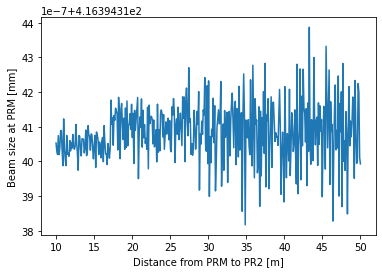

In [8]:
Ls = np.linspace(10, 50, 400)
ws = q_PRM.w.eval(lp1_L=Ls)

plt.plot(Ls, ws / 1e-3)
plt.xlabel("Distance from PRM to PR2 [m]")
plt.ylabel("Beam size at PRM [mm]");

Evaluations can just as easily be performed on grids. If multiple parameter substitutions are arrays then
meshgrids are formed for these parameter combinations, the expression being computed is then evaluated on
a grid.

The example below shows how the beam size at the PRM can now be computed over the curvatures of both PR2 and PR3.

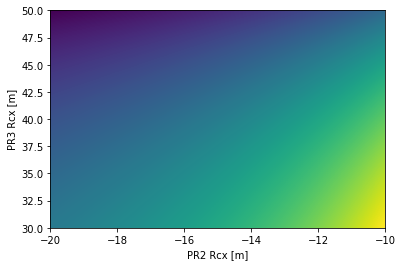

In [9]:
PR2_Rcs = np.linspace(-20, -10, 200)
PR3_Rcs = np.linspace(30, 50, 200)

ws = q_PRM.w.eval(PR2_Rcx=PR2_Rcs, PR3_Rcx=PR3_Rcs)# lp1_L=50)
plt.imshow(ws, extent=[PR2_Rcs.min(), PR2_Rcs.max(), PR3_Rcs.min(), PR3_Rcs.max()], aspect='auto')
plt.xlabel("PR2 Rcx [m]")
plt.ylabel("PR3 Rcx [m]");